# Statistics with Python

Objectives 
* Import data into a `pandas` data frame
* Import some standard and useful libraries for python
* Introduce some model fitting


**Reference and Resource**

This lesson and data is adapted from 
<a href='https://www.linkedin.com/learning/python-statistics-essential-training/'>LinkedIn Learning: Python Statistics Essential Training</a>.  See these lessons for more details including working with categorical data.


## Importing Libraries and Data

We will use several packages for our statistical analyses. In particular, we will use `scipy.stats` and `statsmodels` for running hypothesis testing and model fitting.

In [1]:
# Load standard libraries for data analysis
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

# packages for statistics
import scipy.stats

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline


In [2]:
# Have a question about a package?
# Get documentation with the question mark ?
# INSTRUCTIONS:  Ask about a library here:

?scipy.stats

Type:        module
String form: <module 'scipy.stats' from '/Users/fordfishman/opt/anaconda3/envs/workshop/lib/python3.9/site-packages/scipy/stats/__init__.py'>
File:        ~/opt/anaconda3/envs/workshop/lib/python3.9/site-packages/scipy/stats/__init__.py
Docstring:  
.. _statsrefmanual:

Statistical functions (:mod:`scipy.stats`)

.. currentmodule:: scipy.stats

This module contains a large number of probability distributions,
summary and frequency statistics, correlation functions and statistical
tests, masked statistics, kernel density estimation, quasi-Monte Carlo
functionality, and more.

Statistics is a very large area, and there are topics that are out of scope
for SciPy and are covered by other packages. Some of the most important ones
are:

- `statsmodels <https://www.statsmodels.org/stable/index.html>`__:
  regression, linear models, time series analysis, extensions to topics
  also covered by ``scipy.stats``.
- `Pandas <https://pandas.pydata.org/>`__: tabular data, time ser

## Describe and plot distributions

Let's first import our <a href="https://www.gapminder.org">GapMinder</a> data set and summarize it.


In [3]:
# Import data
gapminder = pd.read_csv('../data/gapminder.csv')
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           14740 non-null  object 
 1   year              14740 non-null  int64  
 2   region            14740 non-null  object 
 3   population        14740 non-null  float64
 4   life_expectancy   14740 non-null  float64
 5   age5_surviving    14740 non-null  float64
 6   babies_per_woman  14740 non-null  float64
 7   gdp_per_capita    14740 non-null  float64
 8   gdp_per_day       14740 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


In [4]:
gapminder

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.00,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.00,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.00,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.00,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.00,647.0,1.771389
...,...,...,...,...,...,...,...,...,...
14735,Zimbabwe,2011,Africa,14255592.0,51.60,90.800,3.64,1626.0,4.451745
14736,Zimbabwe,2012,Africa,14565482.0,54.20,91.330,3.56,1750.0,4.791239
14737,Zimbabwe,2013,Africa,14898092.0,55.70,91.670,3.49,1773.0,4.854209
14738,Zimbabwe,2014,Africa,15245855.0,57.00,91.900,3.41,1773.0,4.854209


### Descriptive statistics

We can use built in functions in pandas to summarize key aspects of our data.

In [5]:
max_pop = gapminder.population.max()
ave_bpw = gapminder.babies_per_woman.mean()
var_bpw = gapminder.babies_per_woman.var()

print('Max population:', max_pop)
print('Mean babies per woman:', ave_bpw)
print('Variance in babies per woman:', var_bpw)

Max population: 1376048943.0
Mean babies per woman: 4.643471506105837
Variance in babies per woman: 3.9793570162855287


We examine quartiles using the `.quantile()` method and specifying 0.25, 0.50 and 0.75. 

In [15]:
gapminder.life_expectancy.quantile([0.25,0.50,0.75])

0.25    44.23
0.50    60.08
0.75    70.38
Name: life_expectancy, dtype: float64

For very simple plots, we can plot directly from pandas, specifying the type of plot with the argument `kind`. Here we make a box plot and a histogram. We can then add labels with matplotlib.

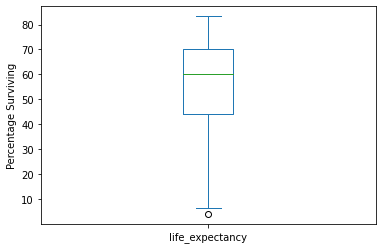

In [14]:
gapminder.life_expectancy.plot(kind='box')
plt.ylabel('Percentage Surviving')
plt.show()

In [27]:
gapminder.age5_surviving.mean()

84.45266533242852

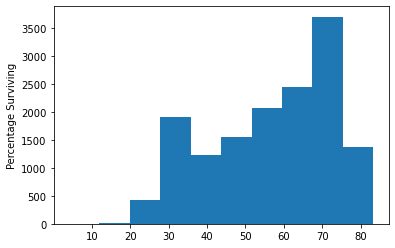

In [13]:
gapminder.life_expectancy.plot(kind='hist')
plt.ylabel('Percentage Surviving')
plt.show()

### Hypothesis Testing

Statistical methods are used to test **hypotheses**. One of the most foundational hypotheses we can ask is "Is the mean of this sample different from some value?" Typically, the value we are comparing the mean to has some sort of relavence.

While the actual mean of the sample might be different, we want to know if our data could have been generated if the true mean was a certain value. To do this, we use a **1-sample t-test**. 

To run a 1-sample t-test, we can use the `ttest_1sample()` function from the `scipy.stats` module.

In [26]:
# 1 Sample t-test
# Is the mean of the data 84.4?
scipy.stats.ttest_1samp(gapminder['life_expectancy'], 57)

Ttest_1sampResult(statistic=-1.2660253842508842, pvalue=0.20552400415951508)

If we want to compare the means in two samples, we need to run a **2-sample t-test**, also called an **independent samples t-test**. We can use the function `ttest_ind()` for this.

In [28]:
# 2 sample t-test
gdata_us = gapminder[gapminder.country == 'United States']
gdata_canada = gapminder[gapminder.country == 'Canada']

scipy.stats.ttest_ind(gdata_us.life_expectancy, gdata_canada.life_expectancy)   

Ttest_indResult(statistic=-0.741088317096773, pvalue=0.4597261729067277)

## Fitting Models to Data

We have described the sample of a population with statistics.
Now let's understand what we can say about a population from a sample of data.

In [29]:
# Get data subset
gdata = gapminder.query('year == 1985')
# grab population for point sizes
size = 1e-6 * gdata.population
# assign colors to regions
colors = gdata.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})

# create plotting function
def plotdata():
    gdata.plot.scatter('life_expectancy','babies_per_woman',
                       c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)

Using the custom function we just specified, let's visualize the relationship between `age5_surviving` and `babies_per_woman`.

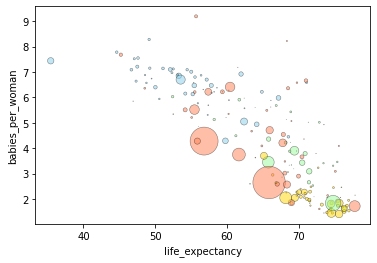

In [30]:
plotdata()

We can see there seems to be some sort of negative relationship between the two variables. There also might be a relationship between region and `babies_per_woman`, as well.

## statmodels

**statsmodels** has many capabilities.

Here we will use Ordinary Least Squares (OLS).
Least squares means models are fit by minimizing the squared difference between predictions and observations.

statsmodels lets us specify models using the "tilda" notation (also used in R)
response variable ~ model terms.  

For example: `babes_per_woman ~ age5surviving`.

Below we use the formula `babies_per_woman ~ 1`. This will essential just use the mean `babies_per_woman` value as the prediction for all data points. 

In [31]:
# Ordinary least squares model
model = smf.ols(formula='babies_per_woman ~ 1',data=gdata)
#    where babies per woman is the response variable and
#    1 represents a constant

# Next, we fit the model
grandmean = model.fit()

Let's make a new function to visualize these results, using the old function we just made and adding in our predictions from our model on top. 

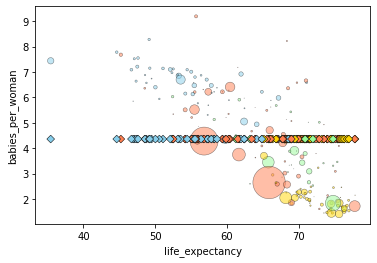

In [33]:
# Let's make a function to plot the data against the model prediction
def plotfit(fit):
    plotdata()
    plt.scatter(gdata.life_expectancy, fit.predict(gdata),
              c=colors,s=30,linewidths=0.5,edgecolor='k',marker='D')
    
plotfit(grandmean)

In [15]:
grandmean.params

Intercept    4.360714
dtype: float64

Ever single data points get predicted to have the same value: 4.36. Thus, this is a very poor model.

Let's try a slightly better model, using the region to preduct babies per woman. We use `-1` in the formula to say we do not want to include a constant in the model.

In [34]:
groupmeans = smf.ols(formula='babies_per_woman ~ -1 + region',data=gdata).fit()

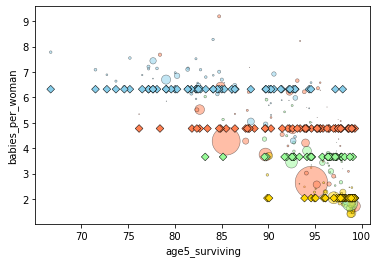

In [17]:
plotfit(groupmeans)

In [18]:
groupmeans.params

region[Africa]     6.321321
region[America]    3.658182
region[Asia]       4.775577
region[Europe]     2.035682
dtype: float64

This is a much more informed model, but we can still do a lot better. Let's take `life_expectancy` into account in a new model.

In [43]:
surviving = smf.ols(formula='babies_per_woman ~ -1 + region + life_expectancy',data=gdata).fit()

region[Africa]     12.953805
region[America]    11.885657
region[Asia]       12.452629
region[Europe]     10.703060
life_expectancy    -0.119281
dtype: float64


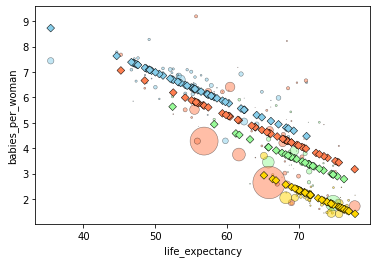

In [44]:
plotfit(surviving)
print(surviving.params)

Now, we have a much better model.

**statsmodels** provides a summary for the fit with Goodness of Fit statistics, and also provides an anova table for the significance of the added variables.

In [45]:
surviving.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       babies_per_woman   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     146.9
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           4.01e-55
Time:                        10:18:04   Log-Likelihood:                -251.93
No. Observations:                 182   AIC:                             513.9
Df Residuals:                     177   BIC:                             529.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
region[Africa]     12.9538      0.674     19.227      0.000      11.624      14.283
region[America]    11.8857      0.836     14.209      0.000      10.235      13.536
region[Asia]       12.4526      0.776     16.045      0.000      10.921      13.984
region[Europe]     10.7031      0.875     12.229      0.000       8.976      12.430
life_expectancy    -0.1193      0.012    -10.047      0.000      -0.143      -0.096
==============================================================================
Omnibus:                       19.859   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.777
Skew:                           0.529   Prob(JB):                     6.26e-09
Kurtosis:                       4.965   Cond. No.                     1.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can also use the `anova_lm()` function with our model to estimate the importance of factors in our model.

In [46]:
sm.stats.anova_lm(surviving, typ=2)

,sum_sq,df,F,PR(>F)
region,973.988539,4.0,253.819435,3.707717e-72
life_expectancy,96.833677,1.0,100.938638,4.459475e-19
Residual,169.801784,177.0,NaN,NaN
